In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [3]:
input_file = 'supplemetary_information_table_SIT2.DETs.xlsx'

In [4]:
df_up = pandas.read_excel(input_file, sheet_name='0.5 uM | 4 h | up', index_col=0)
df_up.head()

,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000023171,GRAMD1B,protein_coding,GRAM domain containing 1B,10932.8766,6.0342,5.008500e-215,1.679200e-210,1.6014,92.8151,4.9696
ENSG00000109321,AREG,protein_coding,amphiregulin,5638.1795,5.5728,2.036100e-08,1.288000e-05,1.4804,95.7550,5.5999
ENSG00000211448,DIO2,protein_coding,iodothyronine deiodinase 2,7589.5312,4.9995,1.984900e-14,2.893400e-11,1.6947,57.0386,4.2730
ENSG00000004799,PDK4,protein_coding,pyruvate dehydrogenase kinase 4,6680.3728,4.7116,2.914100e-13,3.618600e-10,1.4458,38.1393,4.2854
ENSG00000135346,CGA,protein_coding,"glycoprotein hormones, alpha polypeptide",217.4736,4.3729,8.132200e-10,6.058800e-07,0.4438,8.0589,3.1699


In [5]:
df_down = pandas.read_excel(input_file, sheet_name='0.5 uM | 4 h | down', index_col=0)
df_down.head()

,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000196302,RP11-497H16.5,unprocessed_pseudogene,NaN,71.3875,-4.6510,1.730000e-04,4.970000e-02,4.8034,0.1854,2.5850
ENSG00000179772,FOXS1,protein_coding,forkhead box S1,256.8414,-3.5090,3.530000e-08,2.110000e-05,3.1306,0.2234,2.0000
ENSG00000111339,ART4,protein_coding,ADP-ribosyltransferase 4 (Dombrock blood group),1242.7035,-2.5863,1.210000e-17,2.240000e-14,5.7819,0.8633,1.8074
ENSG00000128342,LIF,protein_coding,LIF interleukin 6 family cytokine,622.4756,-2.4356,7.380000e-05,2.290000e-02,2.6894,0.4425,2.0000
ENSG00000007908,SELE,protein_coding,selectin E,4216.4421,-2.3952,2.130000e-16,3.750000e-13,12.5825,2.2078,2.2224


In [6]:
xu = df_up['log2FC']
xd = df_down['log2FC']
yu = -numpy.log10(df_up['Adjusted P-value'])
yd = -numpy.log10(df_down['Adjusted P-value'])

In [7]:
yu[yu > 20] = 20
xu[xu > 5] = 5
xd[xd < -5] = -5

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2971/1871398905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xu[xu > 5] = 5
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2971/1871398905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd[xd < -5] = -5


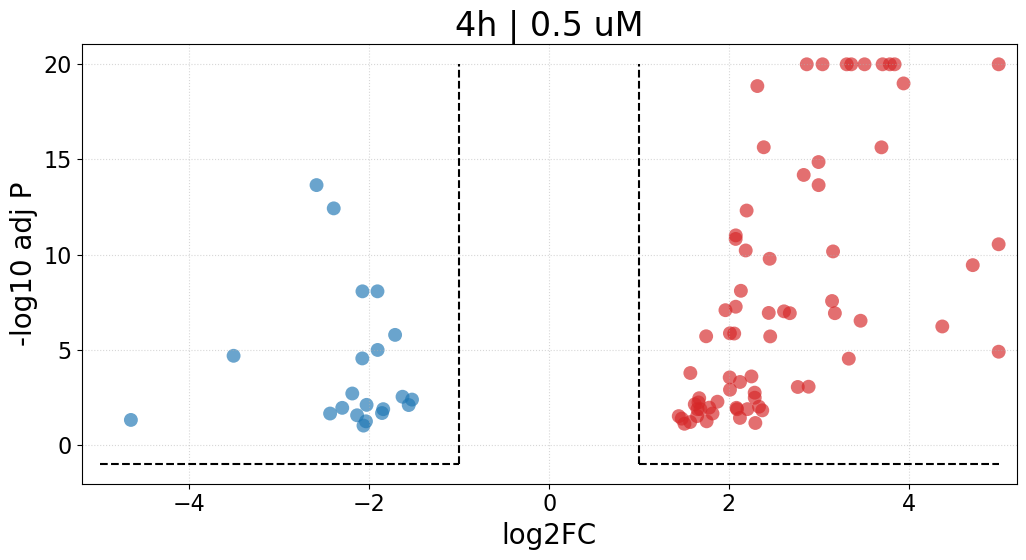

In [8]:
matplotlib.pyplot.scatter(xu, yu, color='tab:red', s=100, alpha=2/3, edgecolors='none')
matplotlib.pyplot.scatter(xd, yd, color='tab:blue', s=100, alpha=2/3, edgecolors='none')

matplotlib.pyplot.plot([-1, -1], [numpy.log10(0.1), 20], color='black', ls='--')
matplotlib.pyplot.plot([1, 1], [numpy.log10(0.1), 20], color='black', ls='--')
matplotlib.pyplot.plot([-5, -1], [numpy.log10(0.1), numpy.log10(0.1)], color='black', ls='--')
matplotlib.pyplot.plot([1, 5], [numpy.log10(0.1), numpy.log10(0.1)], color='black', ls='--')

matplotlib.pyplot.xlabel('log2FC')
matplotlib.pyplot.ylabel('-log10 adj P')
matplotlib.pyplot.xlim([-5.2, 5.2])
matplotlib.pyplot.title('4h | 0.5 uM')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('half_four.svg')